In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from cat_analysis.io import (read_trip_file_names,
                            CleanTrip)

In [3]:
files = read_trip_file_names('/home/tom/Documents/code/cats_data')

In [28]:
#1 - multiple measures okay (might have different fields from others...)
#5 - lots of missing data
#6-  HR only
#25 - a nice example
#32 contains 'invalid date'

ct = CleanTrip(files[40], wave_features=['mean', 'std', 'max'])

In [29]:
ct.clean()

In [30]:
ct.time_series.head()

,merged_n,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,wcvp_max,wcoo_mean,wcoo_std,wcoo_max,wpleth_mean,wpleth_std,wpleth_max,wresp_mean,wresp_std,wresp_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-05 18:03:32,2,"{9.0, 6.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 18:03:33,2,"{9.0, 6.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 18:03:34,2,"{9.0, 6.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,0.500122,2.220446e-16,0.500122,NaN,NaN,NaN
2016-07-05 18:03:35,2,"{9.0, 6.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,0.500122,2.220446e-16,0.500122,NaN,NaN,NaN
2016-07-05 18:03:36,2,"{9.0, 6.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,0.514669,6.607500e-02,0.906471,NaN,NaN,NaN


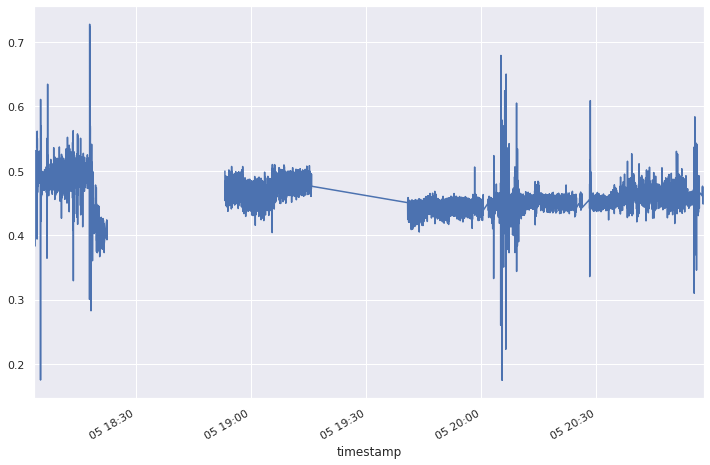

In [24]:
ct.time_series['wpleth_mean'].plot(figsize=(12,8))

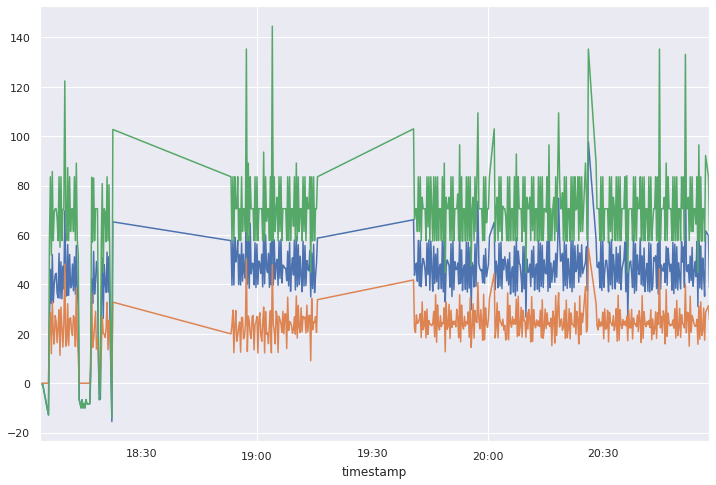

In [31]:
r_ts = ct.resample(rule='15s', interp=True)
r_ts['wcoo_mean'].plot.line(figsize=(12,8))
r_ts['wcoo_std'].plot.line(figsize=(12,8))
r_ts['wcoo_max'].plot.line(figsize=(12,8))
#r_ts['wcoo_min'].plot.line(figsize=(12,8))

In [ ]:
r_ts = ct.resample(rule='60s', interp=False)
r_ts['hr_0002-4182'].plot.line(figsize=(12,8))
r_ts['abps_0002-4a15'].plot.line(figsize=(12,8))
r_ts['nbpm_0002-4a07'].plot.line(figsize=(12,8))

In [ ]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8))